<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_7_Variables_Cualitativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Variables Cualitativas**

In [ ]:
# Instalar paquetes
install.packages("readxl")
install.packages("fastDummies")
install.packages("stargazer")
install.packages("ggplot2")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Llamar librerias
library(readxl)
library(fastDummies)
library(stargazer)
library(dplyr)
library(ggplot2)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## **Variables Dummies**

In [ ]:
data <- read_excel('/content/endes_violencia_2019.xlsx')
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,residente,embarazada,casada,pesoalnacer,lnpeso,violencia,factor
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,Residente habitual,No o no está segura,Actualmente casada,3.79,1.3323660,Violencia Psicológica,0.154803
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.44,1.2354715,Violencia Psicológica,0.154803
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.07,1.1216775,Violencia Psicológica,0.154803
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Anteriormente casada,3.20,1.1631508,Violencia Psicológica,0.065298
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.16,1.1505721,Violencia Psicológica,0.065298
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,2.60,0.9555114,Violencia Psicológica,0.065298


Algunas variables cuando se importa una base de datos se leen en formato caracter (chr). Este tipo de formato no es el adecuado para las estimaciones. Por lo tanto, se debe convertir el formato caracter a un formato de variable cualitativa (fct).

In [ ]:
# Convertir a factor una variable string
data <- data %>%
  mutate(gru_edad=as.factor(gru_edad))
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,residente,embarazada,casada,pesoalnacer,lnpeso,violencia,factor
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,Residente habitual,No o no está segura,Actualmente casada,3.79,1.3323660,Violencia Psicológica,0.154803
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.44,1.2354715,Violencia Psicológica,0.154803
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.07,1.1216775,Violencia Psicológica,0.154803
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Anteriormente casada,3.20,1.1631508,Violencia Psicológica,0.065298
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.16,1.1505721,Violencia Psicológica,0.065298
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,2.60,0.9555114,Violencia Psicológica,0.065298


In [ ]:
# Estimar el modelo
model_1 <- lm(lnpeso ~ escolaridad + gru_edad, data)
summary(model_1)


Call:
lm(formula = lnpeso ~ escolaridad + gru_edad, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86784 -0.08291  0.01733  0.11499  0.58993 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.1108582  0.0078634 141.269  < 2e-16 ***
escolaridad        0.0033871  0.0005512   6.144 8.41e-10 ***
gru_edad23-49 años 0.0265813  0.0061212   4.342 1.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 7855 degrees of freedom
Multiple R-squared:  0.007517,	Adjusted R-squared:  0.007264 
F-statistic: 29.75 on 2 and 7855 DF,  p-value: 1.35e-13


Estimar el modelo:

\begin{gather*}
lnpeso_{i} = \beta_{0} + \beta_{1}escolaridad_{i} + \beta_{2}gru\_edad_{i} + \epsilon_{i}
\end{gather*}


En este caso, la categoría base es el grupo de edad de 15 a 22 años

In [ ]:
# Estimar el mismo modelo pero usando factor
model_2 <- lm(lnpeso ~ escolaridad + factor(gru_edad), data)
summary(model_2)


Call:
lm(formula = lnpeso ~ escolaridad + factor(gru_edad), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86784 -0.08291  0.01733  0.11499  0.58993 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.1108582  0.0078634 141.269  < 2e-16 ***
escolaridad                0.0033871  0.0005512   6.144 8.41e-10 ***
factor(gru_edad)23-49 años 0.0265813  0.0061212   4.342 1.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 7855 degrees of freedom
Multiple R-squared:  0.007517,	Adjusted R-squared:  0.007264 
F-statistic: 29.75 on 2 and 7855 DF,  p-value: 1.35e-13


Estimar el modelo:

\begin{gather*}
lnpeso_{i} = \beta_{0} + \beta_{1}escolaridad_{i} + \beta_{2}gru\_edad_{i} + \epsilon_{i}
\end{gather*}


En este caso, la categoría base es el grupo de edad de 23 a 49 años

In [ ]:
# Especificar la categoría base
data$gru_edad <- relevel(data$gru_edad, "23-49 años")

In [ ]:
# Estimar el mismo modelo pero cambiando de categoría base
model_3 <- lm(lnpeso ~ escolaridad  + factor(gru_edad), data) 
summary(model_3)


Call:
lm(formula = lnpeso ~ escolaridad + factor(gru_edad), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86784 -0.08291  0.01733  0.11499  0.58993 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.1374394  0.0061499 184.952  < 2e-16 ***
escolaridad                 0.0033871  0.0005512   6.144 8.41e-10 ***
factor(gru_edad)15-22 años -0.0265813  0.0061212  -4.342 1.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 7855 degrees of freedom
Multiple R-squared:  0.007517,	Adjusted R-squared:  0.007264 
F-statistic: 29.75 on 2 and 7855 DF,  p-value: 1.35e-13


In [ ]:
# Hacer una tabla en html
stargazer(model_2, model_3,
          type="html", out="modelos.html",
          covariate.labels = c("Escolaridad (años)", "Edad 23-49 años", "Edad 15-22 años", "Constante"),
          dep.var.labels = c("Log Peso al Nacer del niño(a)"), 
          title = "Efecto de la violencia a la mujer embarazada en el peso al nacer del niño(a)",
          notes = c("Fuente: Elaboración Propia"))


<table style="text-align:center"><caption><strong>Efecto de la violencia a la mujer embarazada en el peso al nacer del niño(a)</strong></caption>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2">Log Peso al Nacer del niño(a)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Escolaridad (años)</td><td>0.003<sup>***</sup></td><td>0.003<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.001)</td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">Edad 23-49 años</td><td>0.027<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td

Calcular el predicho $\hat{lnpeso}_{i}$

\begin{gather*}
\hat{lnpeso}_{i}= \hat{\beta}_{0} + \hat{\beta}_{1}escolaridad_{i} + \hat{\beta}_{2}gru\_edad_{i}
\end{gather*}

In [ ]:
# Hallando el predicho de Y
data$pred_y <- predict(model_2, data)
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,residente,embarazada,casada,pesoalnacer,lnpeso,violencia,factor,pred_y
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,Residente habitual,No o no está segura,Actualmente casada,3.79,1.3323660,Violencia Psicológica,0.154803,1.140826
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.44,1.2354715,Violencia Psicológica,0.154803,1.184858
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.07,1.1216775,Violencia Psicológica,0.154803,1.184858
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Anteriormente casada,3.20,1.1631508,Violencia Psicológica,0.065298,1.184858
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.16,1.1505721,Violencia Psicológica,0.065298,1.184858
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,2.60,0.9555114,Violencia Psicológica,0.065298,1.184858


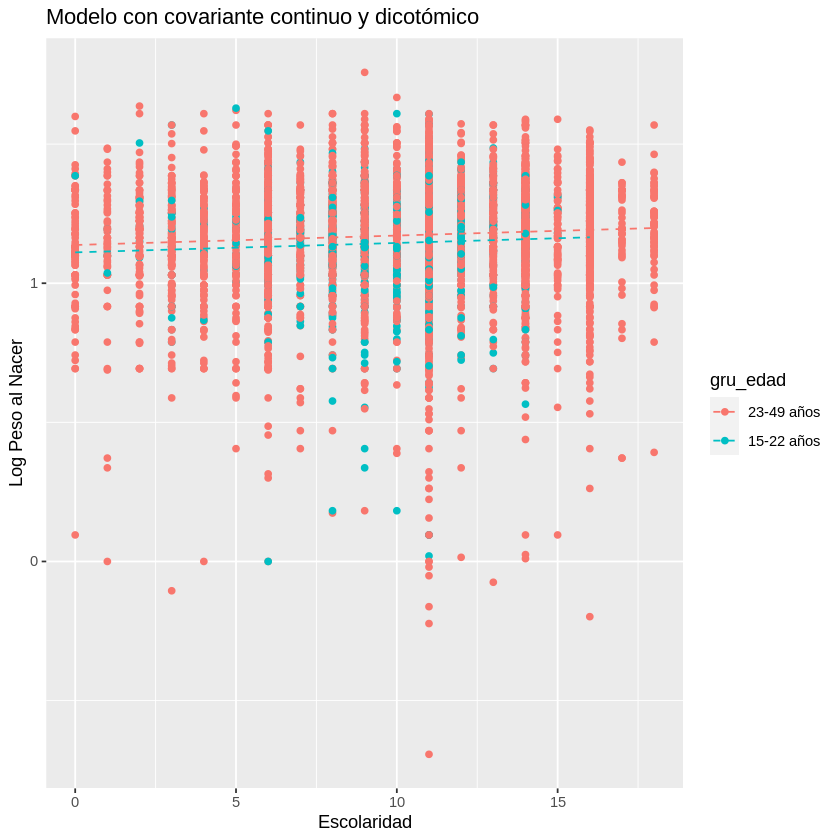

In [ ]:
# Gráfico de los predichos por grupo de edades
ggplot(data, aes(x=escolaridad, y=lnpeso, group=gru_edad, color=gru_edad))+
    geom_point() +
    geom_line(aes(y=pred_y), linetype="dashed") +
    ylab("Log Peso al Nacer") + xlab("Escolaridad") +
    ggtitle("Modelo con covariante continuo y dicotómico")

In [ ]:
data$gru_edad <- relevel(data$gru_edad, "15-22 años")

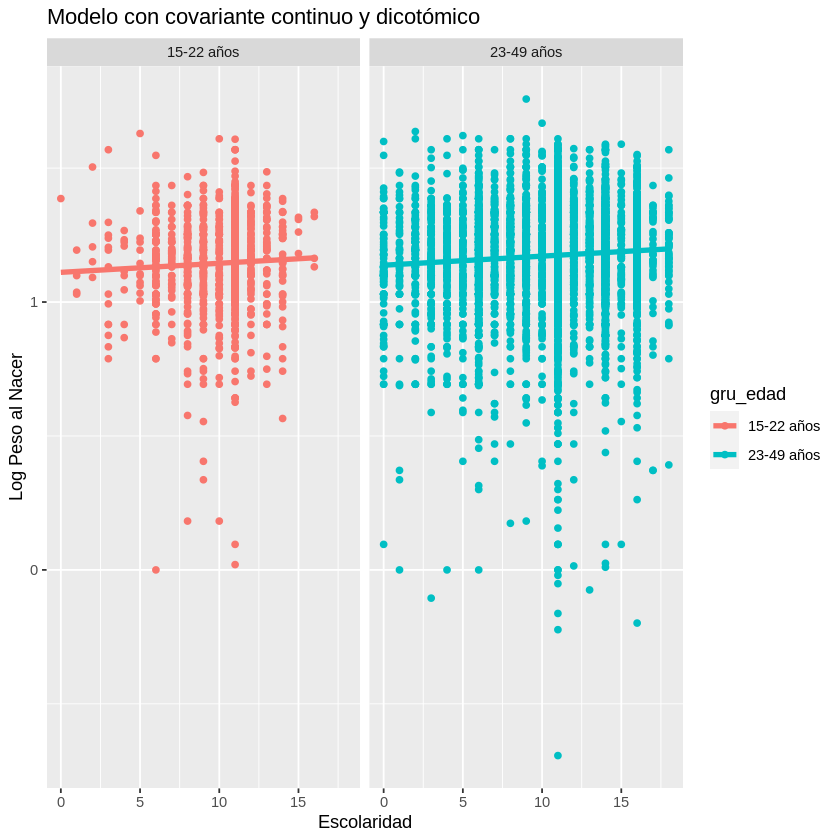

In [ ]:
# Gráfico de los predichos por grupo de edades
ggplot(data, aes(x=escolaridad, y=lnpeso, group=gru_edad, color=gru_edad))+
    geom_point() +
    geom_line(aes(y=pred_y), size=1.5, linetype="solid") +
    ylab("Log Peso al Nacer") + xlab("Escolaridad") +
    ggtitle("Modelo con covariante continuo y dicotómico") + 
    facet_wrap(~ gru_edad)

## **Variables Dummies (cambio pendiente)**

Estimar el modelo:

\begin{gather*}
lnpeso_{i} = \beta_{0} + \beta_{1}escolaridad_{i} + \beta_{2}gru\_edad_{i} + \beta_{3}escolaridad*gru\_edad + \epsilon_{i}
\end{gather*}

In [ ]:
# Estimar el modelo
model_4 <- lm(lnpeso ~ escolaridad  + factor(gru_edad) + escolaridad:factor(gru_edad), data) 
summary(model_4)


Call:
lm(formula = lnpeso ~ escolaridad + factor(gru_edad) + escolaridad:factor(gru_edad), 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86782 -0.08284  0.01732  0.11547  0.58988 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             1.1045715  0.0233377  47.330   <2e-16
escolaridad                             0.0040262  0.0023009   1.750   0.0802
factor(gru_edad)23-49 años              0.0332728  0.0241760   1.376   0.1688
escolaridad:factor(gru_edad)23-49 años -0.0006781  0.0023699  -0.286   0.7748
                                          
(Intercept)                            ***
escolaridad                            .  
factor(gru_edad)23-49 años                
escolaridad:factor(gru_edad)23-49 años    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 7854 degrees of freedom
Multiple R-squared:  0.007527,	Adjusted

Calcular el predicho $\hat{lnpeso}_{i}$

\begin{gather*}
\hat{lnpeso}_{i}= \hat{\beta}_{0} + \hat{\beta}_{1}escolaridad_{i} + \hat{\beta}_{2}gru\_edad_{i} + \hat{\beta}_{3}escolaridad_{i}*gru\_edad_{i} 
\end{gather*}

In [ ]:
# Hallando el predicho de Y
data$pred_y4 <- predict(model_4, data)
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,residente,embarazada,casada,pesoalnacer,lnpeso,violencia,factor,pred_y,pred_y4
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,Residente habitual,No o no está segura,Actualmente casada,3.79,1.3323660,Violencia Psicológica,0.154803,1.140826,1.141192
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.44,1.2354715,Violencia Psicológica,0.154803,1.184858,1.184718
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.07,1.1216775,Violencia Psicológica,0.154803,1.184858,1.184718
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Anteriormente casada,3.20,1.1631508,Violencia Psicológica,0.065298,1.184858,1.184718
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,3.16,1.1505721,Violencia Psicológica,0.065298,1.184858,1.184718
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,Residente habitual,No o no está segura,Actualmente casada,2.60,0.9555114,Violencia Psicológica,0.065298,1.184858,1.184718


In [ ]:
# Hacer una tabla en html
stargazer(model_2, model_4,
          type="html", out="Estimación dicotómica.html",
          covariate.labels = c("Escolaridad (años)", "Edad 23-49 años", "Edad 23-49 años * Escolaridad", "Constante"),
          dep.var.labels = c("Log Peso al Nacer del niño(a)"), 
          title = "Efecto de la violencia a la mujer embarazada en el peso al nacer del niño(a)",
          notes = c("Fuente: Elaboración Propia"))


<table style="text-align:center"><caption><strong>Efecto de la violencia a la mujer embarazada en el peso al nacer del niño(a)</strong></caption>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2">Log Peso al Nacer del niño(a)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Escolaridad (años)</td><td>0.003<sup>***</sup></td><td>0.004<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.001)</td><td>(0.002)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">Edad 23-49 años</td><td>0.027<sup>***</sup></td><td>0.033</td></tr>
<tr><td style="text-align:left"><

## **Variables Categóricas**

In [ ]:
# Establecer que la variable violencia sea del tipo factor categórico
data$violencia <- as.factor(data$violencia)

In [ ]:
# Convertir una variable categorica a variable dummies
data <- dummy_cols(data, select_columns = c("violencia"))

In [ ]:
names(data)

[1] "año"                             "hhid"                           
 [3] "hvidx"                           "hwidx"                          
 [5] "region"                          "area"                           
 [7] "edad"                            "gru_edad"                       
 [9] "escolaridad"                     "ln_sch"                         
[11] "residente"                       "embarazada"                     
[13] "casada"                          "pesoalnacer"                    
[15] "lnpeso"                          "violencia"                      
[17] "factor"                          "pred_y"                         
[19] "pred_y4"                         "violencia_Violencia Física"     
[21] "violencia_Violencia Psicológica" "violencia_Violencia sexual"

In [ ]:
data <- data %>%
  rename(viol_fisica='violencia_Violencia Física',
         viol_psicol='violencia_Violencia Psicológica',
         viol_sexual='violencia_Violencia sexual')
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,⋯,casada,pesoalnacer,lnpeso,violencia,factor,pred_y,pred_y4,viol_fisica,viol_psicol,viol_sexual
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,⋯,Actualmente casada,3.79,1.3323660,Violencia Psicológica,0.154803,1.140826,1.141192,0,1,0
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,⋯,Actualmente casada,3.44,1.2354715,Violencia Psicológica,0.154803,1.184858,1.184718,0,1,0
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,⋯,Actualmente casada,3.07,1.1216775,Violencia Psicológica,0.154803,1.184858,1.184718,0,1,0
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,⋯,Anteriormente casada,3.20,1.1631508,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,⋯,Actualmente casada,3.16,1.1505721,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,⋯,Actualmente casada,2.60,0.9555114,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0


Estimar el modelo:

\begin{gather*}
lnpeso_{i} = \beta_{0} + \beta_{1}escolaridad_{i} + \beta_{2}gru\_edad_{i} + \gamma_{2}viol\_fisica + \gamma_{3}viol\_psicol + \epsilon_{i}
\end{gather*}

In [ ]:
# Estimar el modelo
model_5 <- lm(lnpeso ~ escolaridad  + factor(gru_edad) + viol_fisica + viol_psicol, data) 
summary(model_5)


Call:
lm(formula = lnpeso ~ escolaridad + factor(gru_edad) + viol_fisica + 
    viol_psicol, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85592 -0.08365  0.01744  0.11514  0.60172 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.0995053  0.0100556 109.343  < 2e-16 ***
escolaridad                0.0033157  0.0005528   5.998 2.09e-09 ***
factor(gru_edad)23-49 años 0.0267950  0.0061272   4.373 1.24e-05 ***
viol_fisica                0.0129697  0.0076099   1.704   0.0884 .  
viol_psicol                0.0131907  0.0074980   1.759   0.0786 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1835 on 7853 degrees of freedom
Multiple R-squared:  0.007931,	Adjusted R-squared:  0.007426 
F-statistic:  15.7 on 4 and 7853 DF,  p-value: 8.478e-13


In [ ]:
# Establecer categoría base
data$violencia <- relevel(data$violencia, "Violencia sexual")

In [ ]:
# Estimar el modelo
model_6 <- lm(lnpeso ~ escolaridad  + factor(gru_edad) + factor(violencia), data) 
summary(model_6)


Call:
lm(formula = lnpeso ~ escolaridad + factor(gru_edad) + factor(violencia), 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85592 -0.08365  0.01744  0.11514  0.60172 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.0995053  0.0100556 109.343  < 2e-16
escolaridad                            0.0033157  0.0005528   5.998 2.09e-09
factor(gru_edad)23-49 años             0.0267950  0.0061272   4.373 1.24e-05
factor(violencia)Violencia Física      0.0129697  0.0076099   1.704   0.0884
factor(violencia)Violencia Psicológica 0.0131907  0.0074980   1.759   0.0786
                                          
(Intercept)                            ***
escolaridad                            ***
factor(gru_edad)23-49 años             ***
factor(violencia)Violencia Física      .  
factor(violencia)Violencia Psicológica .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

Calcular el predicho $\hat{lnpeso}_{i}$

\begin{gather*}
\hat{lnpeso}_{i}= \hat{\beta}_{0} + \hat{\beta}_{1}escolaridad_{i} + \hat{\beta}_{2}gru\_edad_{i} + \hat{\gamma}_{2}viol\_fisica_{i} + \hat{\gamma}_{3}viol\_psicol
\end{gather*}

In [ ]:
# Hallando el predicho de Y
data$pred_y6 <- predict(model_6, data)
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,⋯,pesoalnacer,lnpeso,violencia,factor,pred_y,pred_y4,viol_fisica,viol_psicol,viol_sexual,pred_y6
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,⋯,3.79,1.3323660,Violencia Psicológica,0.154803,1.140826,1.141192,0,1,0,1.142807
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,⋯,3.44,1.2354715,Violencia Psicológica,0.154803,1.184858,1.184718,0,1,0,1.185910
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,⋯,3.07,1.1216775,Violencia Psicológica,0.154803,1.184858,1.184718,0,1,0,1.185910
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,⋯,3.20,1.1631508,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0,1.185910
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,⋯,3.16,1.1505721,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0,1.185910
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,⋯,2.60,0.9555114,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0,1.185910


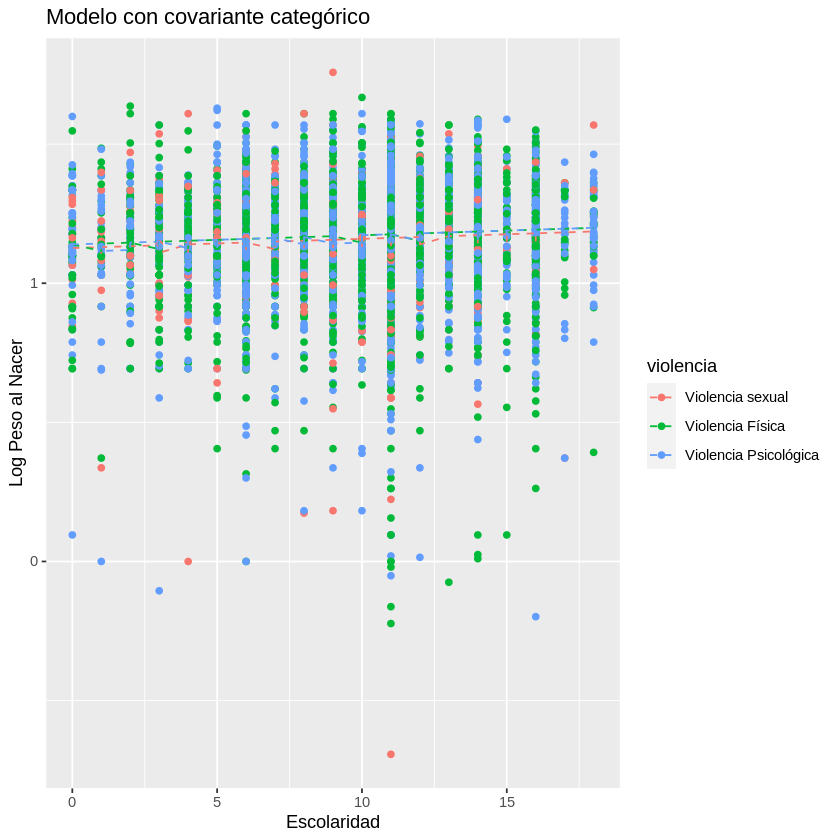

In [ ]:
# Gráfico de los predichos por violencia
ggplot(data, aes(x=escolaridad, y=lnpeso, group=violencia, color=violencia))+
    geom_point() +
    geom_line(aes(y=pred_y6), linetype="dashed") +
    ylab("Log Peso al Nacer") + xlab("Escolaridad") +
    ggtitle("Modelo con covariante categórico")

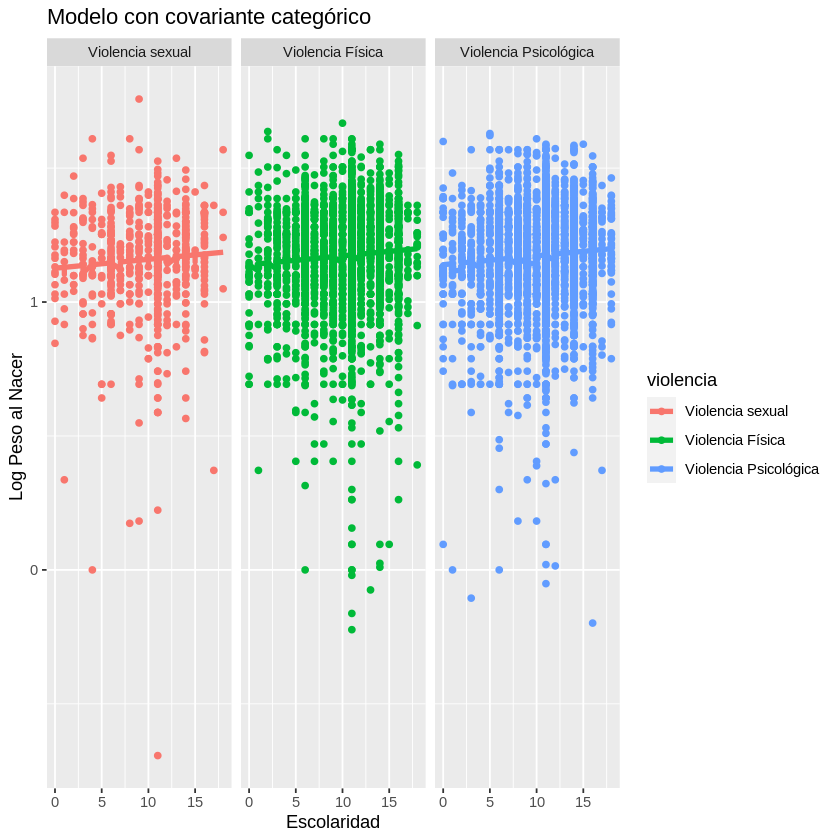

In [ ]:
# Gráfico de los predichos por violencia
ggplot(data, aes(x=escolaridad, y=lnpeso, group=violencia, color=violencia))+
    geom_point() +
    geom_line(aes(y=pred_y6), size=1.5, linetype="solid") +
    ylab("Log Peso al Nacer") + xlab("Escolaridad") +
    ggtitle("Modelo con covariante categórico") + 
    facet_wrap(~ violencia)

## **Variables Categóricas (Cambio en pendiente)**

Estimar el modelo:

\begin{gather*}
lnpeso_{i} = \beta_{0} + \beta_{1}escolaridad_{i} + \beta_{2}gru\_edad_{i} + \gamma_{2}viol\_fisica + \gamma_{3}viol\_psicol + \alpha_{1}(gru\_edad_{i}*viol\_fisica) + \alpha_{2}(gru\_edad_{i}*viol\_psicol) + \epsilon_{i}
\end{gather*}

In [ ]:
# Estimar el modelo
model_7 <- lm(lnpeso ~ escolaridad  + factor(gru_edad) + factor(violencia) + factor(gru_edad):factor(violencia), data) 
summary(model_7)


Call:
lm(formula = lnpeso ~ escolaridad + factor(gru_edad) + factor(violencia) + 
    factor(gru_edad):factor(violencia), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85461 -0.08290  0.01789  0.11487  0.60302 

Coefficients:
                                                                   Estimate
(Intercept)                                                       1.1094411
escolaridad                                                       0.0033097
factor(gru_edad)23-49 años                                        0.0156125
factor(violencia)Violencia Física                                 0.0009083
factor(violencia)Violencia Psicológica                            0.0033278
factor(gru_edad)23-49 años:factor(violencia)Violencia Física      0.0136612
factor(gru_edad)23-49 años:factor(violencia)Violencia Psicológica 0.0111708
                                                                  Std. Error
(Intercept)                                                 

In [ ]:
# Hacer una tabla en html
stargazer(model_6, model_7,
          type="html", out="Estimación categorica.html",
          covariate.labels = c("Escolaridad (años)", "Edad 23-49 años", 
                          "Violencia física", "Violencia psicológica", 
                          "Edad 23-49 años*Violencia física", "Edad 23-49 años*Violencia psicológica","Constante"),
          dep.var.labels = c("Log Peso al Nacer del niño(a)"), 
          title = "Efecto de la violencia a la mujer embarazada en el peso al nacer del niño(a)",
          notes = c("Fuente: Elaboración Propia"))


<table style="text-align:center"><caption><strong>Efecto de la violencia a la mujer embarazada en el peso al nacer del niño(a)</strong></caption>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2">Log Peso al Nacer del niño(a)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Escolaridad (años)</td><td>0.003<sup>***</sup></td><td>0.003<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.001)</td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">Edad 23-49 años</td><td>0.027<sup>***</sup></td><td>0.016</td></tr>
<tr><td style="text-align:left"

Calcular el predicho $\hat{lnpeso}_{i}$

\begin{gather*}
\hat{lnpeso}_{i}= \hat{\beta}_{0} + \hat{\beta}_{1}escolaridad_{i} + \hat{\beta}_{2}gru\_edad_{i} + \hat{\gamma}_{2}viol\_fisica_{i} + \hat{\gamma}_{3}viol\_psicol + \hat{\alpha}_{1}(gru\_edad_{i}*viol\_fisica) + \hat{\alpha}_{2}(gru\_edad_{i}*viol\_psicol)
\end{gather*}

In [ ]:
# Hallando el predicho de Y
data$pred_y7 <- predict(model_7, data)
head(data)

año,hhid,hvidx,hwidx,region,area,edad,gru_edad,escolaridad,ln_sch,⋯,lnpeso,violencia,factor,pred_y,pred_y4,viol_fisica,viol_psicol,viol_sexual,pred_y6,pred_y7
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
2019,000104801,2,1,Amazonas,Urbano,28,23-49 años,1,0.6931472,⋯,1.3323660,Violencia Psicológica,0.154803,1.140826,1.141192,0,1,0,1.142807,1.142862
2019,000113601,2,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,⋯,1.2354715,Violencia Psicológica,0.154803,1.184858,1.184718,0,1,0,1.185910,1.185887
2019,000120701,2,1,Amazonas,Urbano,34,23-49 años,14,2.7080503,⋯,1.1216775,Violencia Psicológica,0.154803,1.184858,1.184718,0,1,0,1.185910,1.185887
2019,000207701,4,1,Amazonas,Urbano,30,23-49 años,14,2.7080503,⋯,1.1631508,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0,1.185910,1.185887
2019,000208001,2,1,Amazonas,Urbano,38,23-49 años,14,2.7080503,⋯,1.1505721,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0,1.185910,1.185887
2019,000209401,2,1,Amazonas,Urbano,33,23-49 años,14,2.7080503,⋯,0.9555114,Violencia Psicológica,0.065298,1.184858,1.184718,0,1,0,1.185910,1.185887
